<a href="https://colab.research.google.com/github/poojamahajan0712/EVA_Pooja/blob/master/S8_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [0]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from PIL import Image

#from transform_func import transform1
from data_load_cifar10 import dataload
from util import *
import resnet
from train import train
from test2 import test
from aug_v1 import album_train,album_test




In [11]:

    
trainloader,testloader,classes =dataload(train_transform=album_train(),test_transorm=album_test())


Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane  bird  ship   car


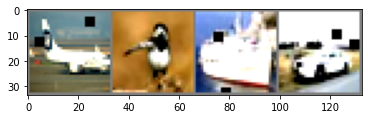

In [12]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[:4],padding=1))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


2. Define a Convolution Neural Network
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [13]:

device = which_device()
net = resnet.ResNet18().to(device)
show_model_summary(net, device, (3,32,32))




----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

 **Define a Loss function and optimizer** 


**Training and Testing**





In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
def run():
  test_losses=[]
  test_accs=[]
  for epoch in range(55):
      print("EPOCH:", epoch+1)
      train(net, device, trainloader, criterion, optimizer, epoch)
      test(net, device, testloader, criterion, classes, test_losses, test_accs)
  

run()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=0.0013842344051226974 Batch_id=390 Accuracy=99.70: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8244/10000 (82.44%)

EPOCH: 2


Loss=0.0048240842297673225 Batch_id=390 Accuracy=99.72: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8326/10000 (83.26%)

EPOCH: 3


Loss=0.0012948631774634123 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8248/10000 (82.48%)

EPOCH: 4


Loss=0.01414864044636488 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8295/10000 (82.95%)

EPOCH: 5


Loss=0.019000524654984474 Batch_id=390 Accuracy=99.76: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8305/10000 (83.05%)

EPOCH: 6


Loss=0.006739961914718151 Batch_id=390 Accuracy=99.74: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0063, Accuracy: 8329/10000 (83.29%)

EPOCH: 7


Loss=0.0026490807067602873 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8365/10000 (83.65%)

EPOCH: 8


Loss=0.011672449298202991 Batch_id=390 Accuracy=99.73: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8257/10000 (82.57%)

EPOCH: 9


Loss=0.0015085100894793868 Batch_id=390 Accuracy=99.68: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8309/10000 (83.09%)

EPOCH: 10


Loss=0.014821618795394897 Batch_id=390 Accuracy=99.70: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8319/10000 (83.19%)

EPOCH: 11


Loss=0.0032943307887762785 Batch_id=390 Accuracy=99.79: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8341/10000 (83.41%)

EPOCH: 12


Loss=0.0011223197216168046 Batch_id=390 Accuracy=99.82: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8326/10000 (83.26%)

EPOCH: 13


Loss=0.04947398975491524 Batch_id=390 Accuracy=99.78: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8319/10000 (83.19%)

EPOCH: 14


Loss=0.0015514374244958162 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8309/10000 (83.09%)

EPOCH: 15


Loss=0.005754256155341864 Batch_id=390 Accuracy=99.80: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8351/10000 (83.51%)

EPOCH: 16


Loss=0.009597879834473133 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8340/10000 (83.40%)

EPOCH: 17


Loss=0.0007884025690145791 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8318/10000 (83.18%)

EPOCH: 18


Loss=0.0006961822509765625 Batch_id=390 Accuracy=99.85: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 8290/10000 (82.90%)

EPOCH: 19


Loss=0.002416205359622836 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8327/10000 (83.27%)

EPOCH: 20


Loss=0.0006725549465045333 Batch_id=390 Accuracy=99.77: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8285/10000 (82.85%)

EPOCH: 21


Loss=0.0009677708148956299 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8326/10000 (83.26%)

EPOCH: 22


Loss=0.0013541221851482987 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8324/10000 (83.24%)

EPOCH: 23


Loss=0.002447020960971713 Batch_id=390 Accuracy=99.79: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8314/10000 (83.14%)

EPOCH: 24


Loss=0.0007880687480792403 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8274/10000 (82.74%)

EPOCH: 25


Loss=0.0029649913776665926 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8323/10000 (83.23%)

EPOCH: 26


Loss=0.00029441117658279836 Batch_id=390 Accuracy=99.85: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8329/10000 (83.29%)

EPOCH: 27


Loss=0.012891215272247791 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8314/10000 (83.14%)

EPOCH: 28


Loss=0.004147988744080067 Batch_id=390 Accuracy=99.88: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8371/10000 (83.71%)

EPOCH: 29


Loss=0.0008410096052102745 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8413/10000 (84.13%)

EPOCH: 30


Loss=0.003383886767551303 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8379/10000 (83.79%)

EPOCH: 31


Loss=0.0568697564303875 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8300/10000 (83.00%)

EPOCH: 32


Loss=0.003736782120540738 Batch_id=390 Accuracy=99.83: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0068, Accuracy: 8297/10000 (82.97%)

EPOCH: 33


Loss=0.004425066523253918 Batch_id=390 Accuracy=99.81: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0070, Accuracy: 8328/10000 (83.28%)

EPOCH: 34


Loss=0.0017086208099499345 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8328/10000 (83.28%)

EPOCH: 35


Loss=0.0034714757930487394 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8375/10000 (83.75%)

EPOCH: 36


Loss=0.0012374042998999357 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0064, Accuracy: 8412/10000 (84.12%)

EPOCH: 37


Loss=0.004180449061095715 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:54<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8338/10000 (83.38%)

EPOCH: 38


Loss=0.0004193306085653603 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0069, Accuracy: 8323/10000 (83.23%)

EPOCH: 39


Loss=0.050625067204236984 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8356/10000 (83.56%)

EPOCH: 40


Loss=0.003072118852287531 Batch_id=390 Accuracy=99.84: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8365/10000 (83.65%)

EPOCH: 41


Loss=0.00100039248354733 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8363/10000 (83.63%)

EPOCH: 42


Loss=0.0006628036499023438 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8389/10000 (83.89%)

EPOCH: 43


Loss=0.0008441567188128829 Batch_id=390 Accuracy=99.89: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8374/10000 (83.74%)

EPOCH: 44


Loss=0.025235021486878395 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:55<00:00,  7.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8358/10000 (83.58%)

EPOCH: 45


Loss=0.003375417087227106 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8325/10000 (83.25%)

EPOCH: 46


Loss=0.0005509853363037109 Batch_id=390 Accuracy=99.86: 100%|██████████| 391/391 [00:54<00:00,  7.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8360/10000 (83.60%)

EPOCH: 47


Loss=0.0009680688381195068 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8322/10000 (83.22%)

EPOCH: 48


Loss=0.0012680173385888338 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8358/10000 (83.58%)

EPOCH: 49


Loss=0.0005807221168652177 Batch_id=390 Accuracy=99.90: 100%|██████████| 391/391 [00:55<00:00,  7.07it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0065, Accuracy: 8412/10000 (84.12%)

EPOCH: 50


Loss=0.0008210301166400313 Batch_id=390 Accuracy=99.92: 100%|██████████| 391/391 [00:54<00:00,  7.14it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8371/10000 (83.71%)

EPOCH: 51


Loss=0.0004535675107035786 Batch_id=390 Accuracy=99.89: 100%|██████████| 391/391 [00:55<00:00,  7.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8360/10000 (83.60%)

EPOCH: 52


Loss=0.01673152483999729 Batch_id=390 Accuracy=99.87: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8370/10000 (83.70%)

EPOCH: 53


Loss=0.009080290794372559 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:55<00:00,  7.09it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0066, Accuracy: 8381/10000 (83.81%)

EPOCH: 54


Loss=0.0008923053974285722 Batch_id=390 Accuracy=99.91: 100%|██████████| 391/391 [00:54<00:00,  7.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 8394/10000 (83.94%)

EPOCH: 55


Loss=0.0017387985717505217 Batch_id=390 Accuracy=99.93: 100%|██████████| 391/391 [00:55<00:00,  7.10it/s]


Test set: Average loss: 0.0066, Accuracy: 8368/10000 (83.68%)



GroundTruth:   deer   car horse  deer


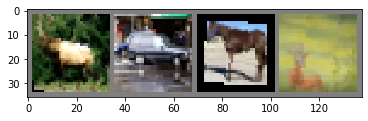

In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:
The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


In [0]:
images=images.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.

